## Exploratory Data Analysis (EDA)

In [4]:
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [5]:
try:
    with open('../config.yaml') as file:
        config = yaml.safe_load(file)
except:
    print("Yaml file not found.")

### 1 Load Datasets

#### 1.1 Judicial Autonomy Index and macro indicators subset & V-Dem dataset

In [6]:
# Load merged datasets
q1_index_macro_vdem = pd.read_csv(config['output_data']['q1_output_index_macro_vdem'])
q1_index_macro_vdem.head()

,country,year,country_year,index_measure,q1_macro_appointment_procedures_ind_measure,q1_macro_selection_criteria_ind_measure,q1_macro_professional_rights_ind_measure,q1_macro_professional_obligations_ind_measure,q1_macro_judicial_administration_ind_measure,reg_type,v2x_regime,v2x_polyarchy
0,Albania,2000,Albania_2000,0.52,0.55,0.5,0.42,0.65,0.5,0.0,1.0,0.407
1,Albania,2001,Albania_2001,0.52,0.55,0.5,0.42,0.65,0.5,0.0,1.0,0.440
2,Albania,2002,Albania_2002,0.52,0.55,0.5,0.42,0.65,0.5,0.0,1.0,0.484
3,Albania,2003,Albania_2003,0.52,0.55,0.5,0.42,0.65,0.5,0.0,1.0,0.490
4,Albania,2004,Albania_2004,0.55,0.55,0.5,0.42,0.76,0.5,0.0,1.0,0.490


In [4]:
# Check datatypes
q1_index_macro_vdem.dtypes

country                                           object
year                                               int64
country_year                                      object
index_measure                                    float64
q1_macro_appointment_procedures_ind_measure      float64
q1_macro_selection_criteria_ind_measure          float64
q1_macro_professional_rights_ind_measure         float64
q1_macro_professional_obligations_ind_measure    float64
q1_macro_judicial_administration_ind_measure     float64
reg_id                                            object
reg_type                                         float64
v2x_regime                                       float64
v2x_polyarchy                                    float64
reg_trans                                        float64
row_regch_event                                  float64
dem_ep                                             int64
dtype: object

In [5]:
# Change datatypes
q1_index_macro_vdem = q1_index_macro_vdem.astype({'reg_type': 'int', 'v2x_regime': 'int'})

**Output -- DataFrame:** `q1_index_macro_vdem`

#### 1.2 Judicial Autonomy index, macro indicators and micro indicators subset & V-Dem dataset

In [7]:
# Load merged datasets
q1_index_macro_micro_vdem = pd.read_csv(config['output_data']['q1_output_index_macro_micro_vdem'])
q1_index_macro_micro_vdem.head()

,country,year,country_year,index_measure,q1_macro_appointment_procedures_ind_measure,q1_micro_appointment_judges_ind_measure,q1_micro_appointment_court_presidents_ind_measure,q1_micro_appointment_veto_ind_measure,q1_macro_selection_criteria_ind_measure,q1_micro_selection_predetermined_law_ind_measure,...,q1_micro_disciplinary_proceedings_law_ind_measure,q1_micro_disciplinary_proceedings_actors_ind_measure,q1_micro_conflict_recusal_evaluation_ind_measure,q1_macro_judicial_administration_ind_measure,q1_micro_judicial_self_governance_bodies_ind_measure,q1_micro_judicial_self_governance_competences_ind_measure,q1_micro_courts_administration_ind_measure,reg_type,v2x_regime,v2x_polyarchy
0,Albania,2000,Albania_2000,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.407
1,Albania,2001,Albania_2001,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.440
2,Albania,2002,Albania_2002,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.484
3,Albania,2003,Albania_2003,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.490
4,Albania,2004,Albania_2004,0.55,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,1.00,0.5,0.5,0.0,1.0,0.0,1.0,0.490


**Output -- DataFrame:** `q1_index_macro_micro_vdem`

In [8]:
# Check datatypes
q1_index_macro_micro_vdem.dtypes

country                                                       object
year                                                           int64
country_year                                                  object
index_measure                                                float64
q1_macro_appointment_procedures_ind_measure                  float64
q1_micro_appointment_judges_ind_measure                      float64
q1_micro_appointment_court_presidents_ind_measure            float64
q1_micro_appointment_veto_ind_measure                        float64
q1_macro_selection_criteria_ind_measure                      float64
q1_micro_selection_predetermined_law_ind_measure             float64
q1_micro_selection_intl_standards_ind_measure                float64
q1_micro_transparency_appeal_ind_measure                     float64
q1_macro_professional_rights_ind_measure                     float64
q1_micro_judge_tenure_ind_measure                            float64
q1_micro_judge_immunity_ind_measur

### 2 EDA -- Univariate Analysis 

#### 2.1 Numerical -- Judicial Autonomy Index

#### 2.1.1 Summary Statistics

In [7]:
# Measures of Centrality and Dispersion

summary_statistics_q1_index_macro_vdem = q1_index_macro_vdem['index_measure'].describe()
median_q1_index_macro_vdem = q1_index_macro_vdem['index_measure'].median()

print(summary_statistics_q1_index_macro_vdem)
print("Median:", median_q1_index_macro_vdem)

count    920.000000
mean       0.705707
std        0.134981
min        0.290000
25%        0.620000
50%        0.710000
75%        0.800000
max        0.960000
Name: index_measure, dtype: float64
Median: 0.71


In [8]:
# Shape of the Distribution

skewness_q1_index_macro_vdem = q1_index_macro_vdem['index_measure'].skew()
kurtosis_q1_index_macro_vdem = q1_index_macro_vdem['index_measure'].kurtosis()

print("Skewness of Judicial Autonomy Index:", skewness_q1_index_macro_vdem)
print("Kurtosis of Judicial Autonomy Index:", kurtosis_q1_index_macro_vdem)

Skewness of Judicial Autonomy Index: -0.5318361757794267
Kurtosis of Judicial Autonomy Index: 0.12765192963429284


**Interpretation:**
- The Judicial Autonomy Index distribution is moderately left-skewed (approx. -0.53), i.e. the moderate negative skewness suggests a slight concentration of data on the higher value side.
- The kurtosis (approx. 0.13) close to 0 suggests the distribution has neither particularly heavy nor light tails when compared to a normal distribution, i.e. the overall distribution isn’t far from symmetrical.
- The majority of the data cluster around the higher side of the median (???). 


#### 2.1.2 Histograms

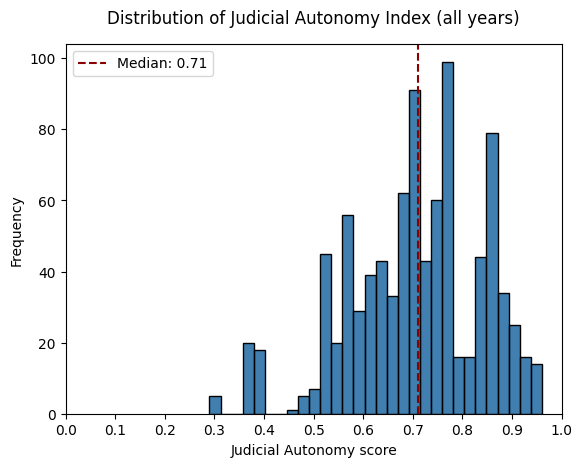

In [9]:
# Histogram for Judicial Autonomy Index (all years) incl. median line

sns.histplot(q1_index_macro_vdem['index_measure'], bins=30, color='#005495') #kde=True

median_value = q1_index_macro_vdem['index_measure'].median()
plt.axvline(median_value, color='darkred', linestyle='--', label=f'Median: {median_value:.2f}')

plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlim(0.0, 1.0)

plt.legend(loc='upper left')
plt.title('Distribution of Judicial Autonomy Index (all years)', fontsize=12, pad=15)
plt.xlabel('Judicial Autonomy score')
plt.ylabel('Frequency')

plt.savefig("../figures/judicial_autonomy_all_years_histogram_median.jpeg", format="jpeg", dpi=300) # figures/judicial_autonomy_all_years_histogram_median.jpeg
plt.show();


In [10]:
# Filter data for year 2000
q1_index_macro_vdem_2000 = q1_index_macro_vdem.loc[q1_index_macro_vdem['year'] == 2000]

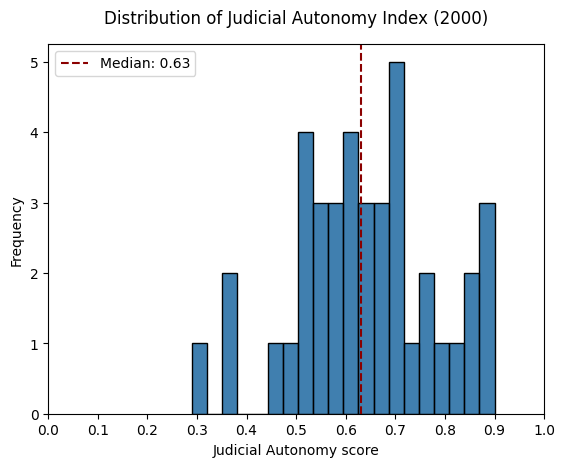

In [11]:
# Histogram for Judicial Autonomy Index (2000) incl. median line

sns.histplot(q1_index_macro_vdem_2000['index_measure'], bins=20, color='#005495') #kde=True 

median_value = q1_index_macro_vdem_2000['index_measure'].median()
plt.axvline(median_value, color='darkred', linestyle='--', label=f'Median: {median_value:.2f}')

plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlim(0.0, 1.0)

plt.legend(loc='upper left')
plt.title('Distribution of Judicial Autonomy Index (2000)', fontsize=12, pad=15)
plt.xlabel('Judicial Autonomy score')
plt.ylabel('Frequency')

plt.savefig("../figures/judicial_autonomy_2000_histogram_median.jpeg", format="jpeg", dpi=300) # figures/judicial_autonomy_all_years_histogram_median.jpeg
plt.show();

In [12]:
# Filter data for year 2011
q1_index_macro_vdem_2011 = q1_index_macro_vdem.loc[q1_index_macro_vdem['year'] == 2011]

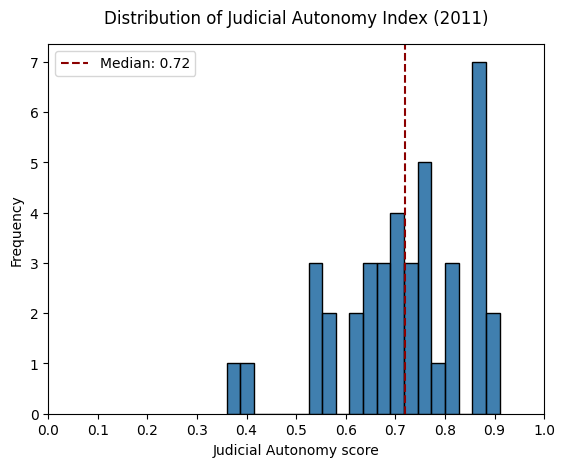

In [13]:
# Histogram for Judicial Autonomy Index (2011) incl. median line

sns.histplot(q1_index_macro_vdem_2011['index_measure'], bins=20, color='#005495') #kde=True 

median_value = q1_index_macro_vdem_2011['index_measure'].median()
plt.axvline(median_value, color='darkred', linestyle='--', label=f'Median: {median_value:.2f}')

plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlim(0.0, 1.0)

plt.legend(loc='upper left')
plt.title('Distribution of Judicial Autonomy Index (2011)', fontsize=12, pad=15)
plt.xlabel('Judicial Autonomy score')
plt.ylabel('Frequency')

plt.savefig("../figures/judicial_autonomy_2011_histogram_median.jpeg", format="jpeg", dpi=300)
plt.show();

In [14]:
# Filter data for year 2022
q1_index_macro_vdem_2022 = q1_index_macro_vdem.loc[q1_index_macro_vdem['year'] == 2022]

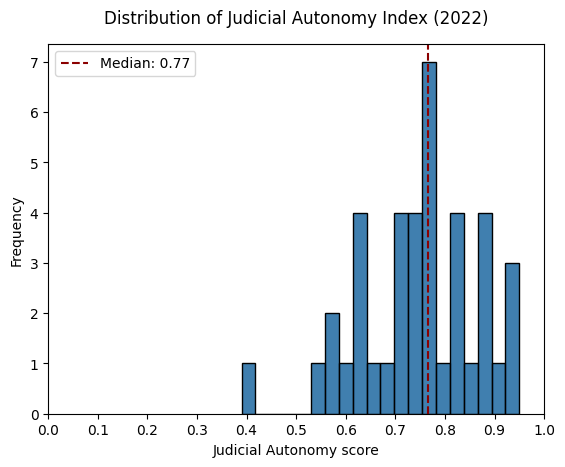

In [15]:
# Histogram for Judicial Autonomy Index (2022) incl. median line

sns.histplot(q1_index_macro_vdem_2022['index_measure'], bins=20, color='#005495') #kde=True 

median_value = q1_index_macro_vdem_2022['index_measure'].median()
plt.axvline(median_value, color='darkred', linestyle='--', label=f'Median: {median_value:.2f}')

plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlim(0.0, 1.0)

plt.legend(loc='upper left')
plt.title('Distribution of Judicial Autonomy Index (2022)', fontsize=12, pad=15)
plt.xlabel('Judicial Autonomy score')
plt.ylabel('Frequency')

plt.savefig("../figures/judicial_autonomy_2022_histogram_median.jpeg", format="jpeg", dpi=300)
plt.show();

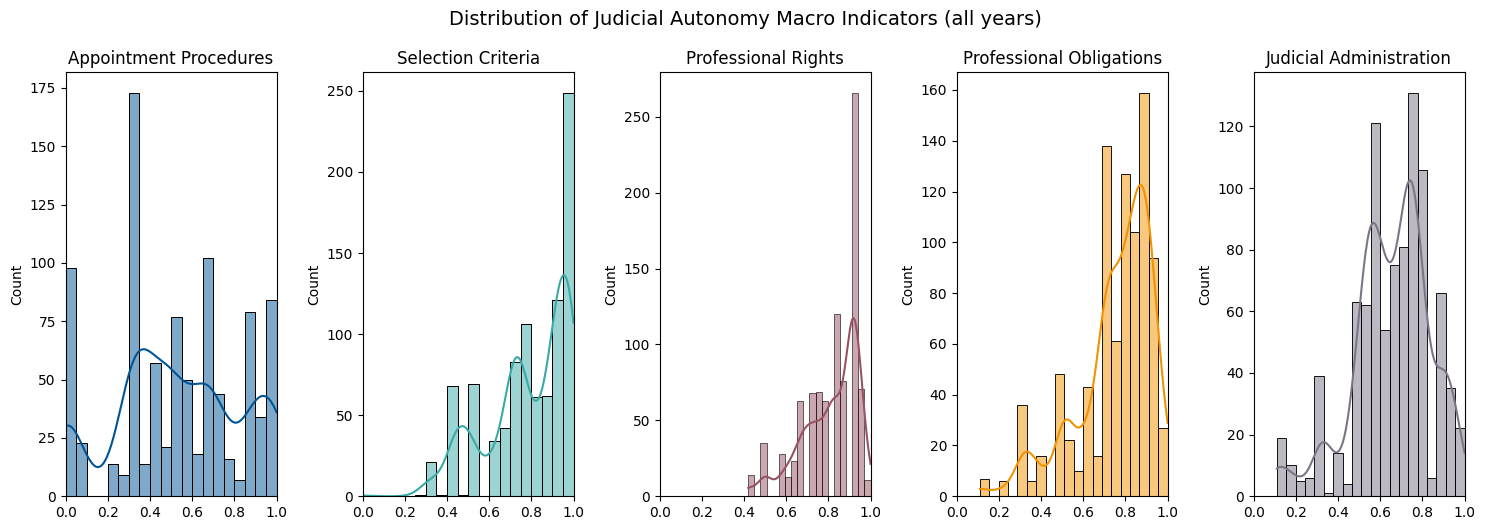

In [16]:
# Subplots for Judicial Autonomy Macro Indicators (all years)

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for ax in axs:
    ax.set_xlim(0.0, 1.0)
    
# Plot separate histograms
sns.histplot(q1_index_macro_vdem['q1_macro_appointment_procedures_ind_measure'], bins=20, color='#005495', ax=axs[0], kde=True)
axs[0].set_title('Appointment Procedures')
axs[0].set_xlabel('')

sns.histplot(q1_index_macro_vdem['q1_macro_selection_criteria_ind_measure'], bins=20, color='#38aaa7', ax=axs[1], kde=True)
axs[1].set_title('Selection Criteria')
axs[1].set_xlabel('')

sns.histplot(q1_index_macro_vdem['q1_macro_professional_rights_ind_measure'], bins=20, color='#995263', ax=axs[2], kde=True)
axs[2].set_title('Professional Rights')
axs[2].set_xlabel('')

sns.histplot(q1_index_macro_vdem['q1_macro_professional_obligations_ind_measure'], bins=20, color='#f39200', ax=axs[3], kde=True)
axs[3].set_title('Professional Obligations')
axs[3].set_xlabel('')

sns.histplot(q1_index_macro_vdem['q1_macro_judicial_administration_ind_measure'], bins=20, color= '#7d7486', ax=axs[4], kde=True)
axs[4].set_title('Judicial Administration')
axs[4].set_xlabel('')


plt.tight_layout()
fig.suptitle('Distribution of Judicial Autonomy Macro Indicators (all years)', fontsize=14, y=1.05) 

plt.savefig("../figures/judicial_autonomy_macro_all_years_subplots.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

#### 2.1.3 Boxplots

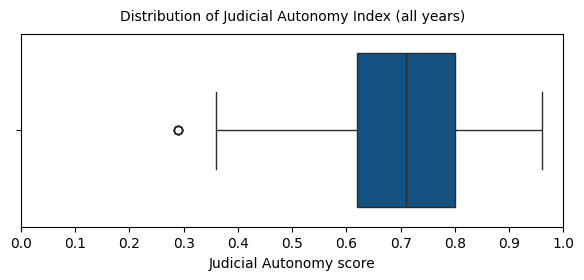

In [17]:
# Box plot of Judicial Autonomy Index (all years)

plt.figure(figsize=(7,2.5))
sns.boxplot(x=q1_index_macro_vdem['index_measure'], color='#005495')
plt.title('Distribution of Judicial Autonomy Index (all years)', fontsize=10, pad=10)
plt.xlabel('Judicial Autonomy score')
plt.xlim(0.0, 1.0)
plt.xticks(np.arange(0, 1.1, 0.1))

plt.savefig("../figures/judicial_autonomy_index_all_years_boxplot.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show();

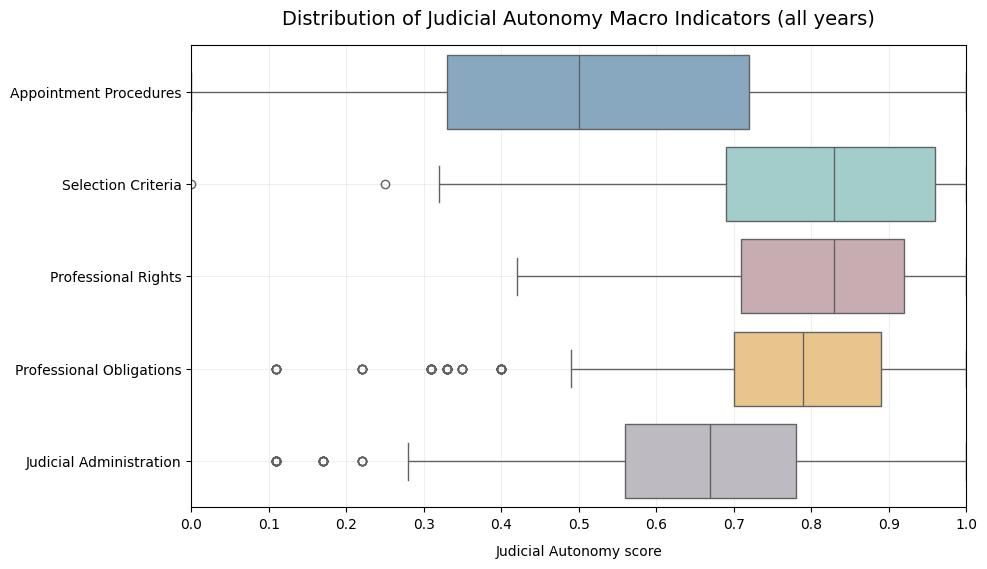

In [18]:
# Side-by-side box plot of Judicial Autonomy Macro Indicators (all years)

# Create long dataframe + Rename variable names
long_format_df = q1_index_macro_vdem.rename(columns={
    'q1_macro_judicial_administration_ind_measure': 'Judicial Administration',
    'q1_macro_professional_obligations_ind_measure': 'Professional Obligations',
    'q1_macro_professional_rights_ind_measure': 'Professional Rights',
    'q1_macro_selection_criteria_ind_measure': 'Selection Criteria',
    'q1_macro_appointment_procedures_ind_measure': 'Appointment Procedures' 
}).melt(value_vars=['Appointment Procedures', 'Selection Criteria', 'Professional Rights', 
                    'Professional Obligations', 'Judicial Administration'], 
        var_name='Indicator', value_name='Value')

# Set color map
color_map = {'Appointment Procedures': '#7fa9c9',
             'Selection Criteria': '#9bd4d2',
             'Professional Rights': '#cba8b0',
             'Professional Obligations': '#f8c87f',
             'Judicial Administration': '#bdb9c2'
            }

plt.figure(figsize=(10, 6))
sns.boxplot(data=long_format_df, 
            x='Value', 
            y='Indicator', 
            hue='Indicator',
            palette=color_map)

plt.title('Distribution of Judicial Autonomy Macro Indicators (all years)', fontsize=14, pad=15)
plt.xlabel('Judicial Autonomy score', labelpad=10)
plt.ylabel('')
plt.xlim(0.0, 1.0)  # Set x-axis limits
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.grid(alpha=0.2)

plt.savefig("../figures/judicial_autonomy_macro_indicators_all_years_side_by_side_boxplot.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show();

#### 2.2 Numerical -- V-Dem Democracy Index

In [19]:
# 
q1_index_macro_vdem.groupby('v2x_regime')['index_measure'].describe()

,count,mean,std,min,25%,50%,75%,max
v2x_regime,,,,,,,,
1,147.0,0.631497,0.159143,0.29,0.55,0.620,0.76,0.95
2,268.0,0.725597,0.122444,0.51,0.63,0.735,0.83,0.96
3,505.0,0.716752,0.126507,0.36,0.65,0.720,0.82,0.91


In [20]:
q1_index_macro_vdem.groupby('v2x_regime')['v2x_polyarchy'].describe()

,count,mean,std,min,25%,50%,75%,max
v2x_regime,,,,,,,,
1,147.0,0.363959,0.094898,0.186,0.2895,0.3780,0.44850,0.497
2,268.0,0.666291,0.107873,0.501,0.5655,0.6575,0.77425,0.855
3,505.0,0.870705,0.037730,0.595,0.8570,0.8770,0.89300,0.919


#### 2.3 Categorical -- V-Dem Regime Types

In [21]:
# Frequency table for V-Dem Regime Type

frequency_table = q1_index_macro_vdem['v2x_regime'].value_counts()
frequency_table = frequency_table.rename(index={1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy'})
frequency_table

v2x_regime
Liberal Democracy      505
Electoral Democracy    268
Electoral Autocracy    147
Name: count, dtype: int64

In [22]:
# Proportion table for V-Dem Regime Type (in percentage)

proportion_table = q1_index_macro_vdem['v2x_regime'].value_counts(normalize=True)*100
proportion_table = proportion_table.rename(index={1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy'})
proportion_table

v2x_regime
Liberal Democracy      54.891304
Electoral Democracy    29.130435
Electoral Autocracy    15.978261
Name: proportion, dtype: float64

#### 2.3.1  Frequency of V-Dem Regime Types for all years

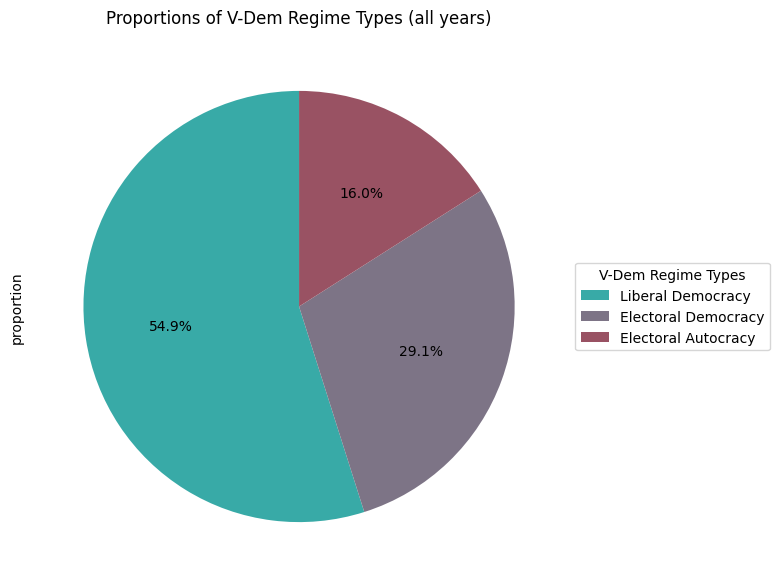

In [23]:
# Pie chart for V-Dem Regime Type (total number of observations across all years)

colors = ['#38aaa7', '#7d7486', '#995263'] # CCRD colours # before: ['#cbd0d8', '#afeeee', '#77dd77']

proportion_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, labels=None, figsize=(10, 7))

plt.legend(title='V-Dem Regime Types', loc='center left', bbox_to_anchor=(1, 0.5), labels=proportion_table.index)
plt.title('Proportions of V-Dem Regime Types (all years)', fontsize=12, pad=10)

plt.savefig("../figures/regime_types_all_years_piechart.jpeg", format="jpeg", dpi=300)
plt.show();

#### 2.3.2 Frequency of V-Dem Regime Types per year

In [24]:
# Frequency table for V-Dem Regime Types per year

# Create frequency table
frequency_table_year_regimetype = q1_index_macro_vdem.groupby('year')['v2x_regime'].value_counts().unstack()

# Renaming Regime Types (to 1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy')
frequency_table_year_regimetype = frequency_table_year_regimetype.rename(columns={1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy'})

# Display dataframe
frequency_table_year_regimetype

v2x_regime,Electoral Autocracy,Electoral Democracy,Liberal Democracy
year,,,
2000,9,9,22
2001,8,10,22
2002,7,11,22
2003,7,11,22
2004,5,12,23
2005,5,12,23
2006,4,13,23
2007,5,11,24
2008,6,10,24


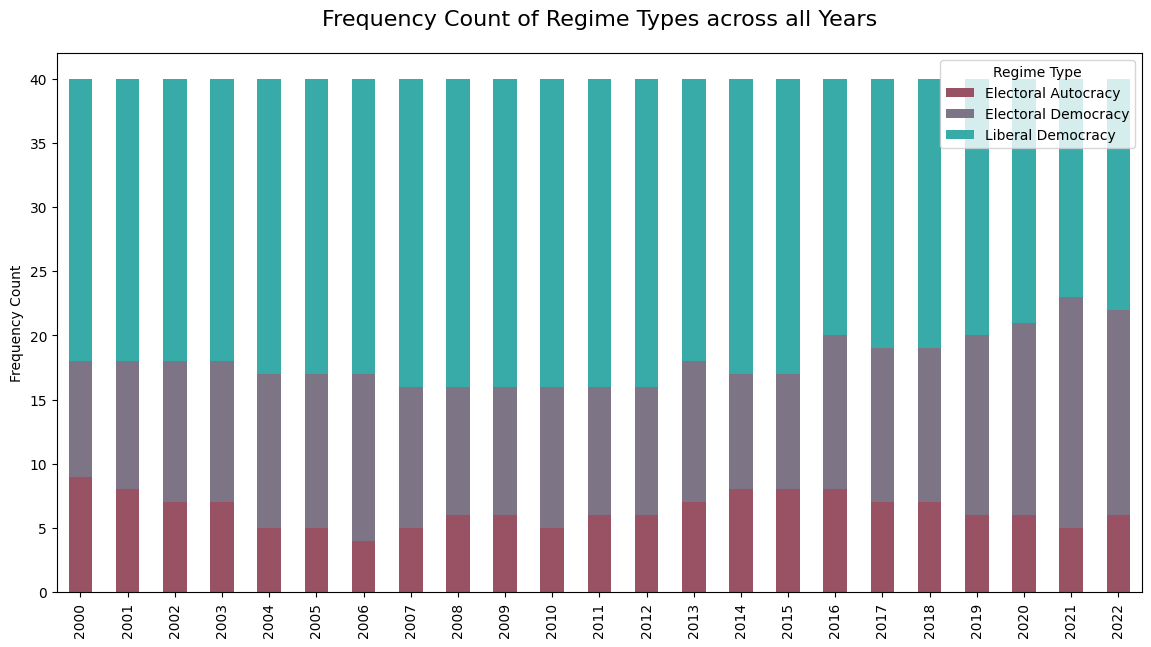

In [25]:
# Stacked Barplot for V-Dem Regime Types per year

colors = ['#995263', '#7d7486', '#38aaa7']

frequency_table_year_regimetype.plot(kind='bar', stacked=True, color=colors, figsize=(14, 7))

plt.title('Frequency Count of Regime Types across all Years', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Frequency Count')
plt.legend(title='Regime Type')

plt.savefig("../figures/regime_types_all_years_stacked_barplots.jpeg", format="jpeg", dpi=300)
plt.show();

### 3 EDA -- Bivariate Analysis -- Judicial Autonomy & V-Dem Democracy Score Merged

#### 3.1 Scatterplots of Judicial Autonomy Index vs. V-Dem Electoral Democracy Index

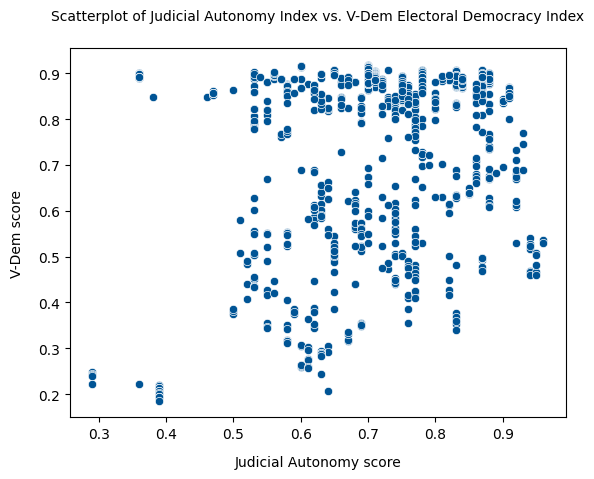

In [26]:
# Scatterplot of Judicial Autonomy Index vs. V-Dem Electoral Democracy Index

sns.scatterplot(data=q1_index_macro_vdem, x='index_measure' , y='v2x_polyarchy', color='#005495')
plt.title('Scatterplot of Judicial Autonomy Index vs. V-Dem Electoral Democracy Index', fontsize=10, pad=20)
plt.xlabel('Judicial Autonomy score', labelpad=10)
plt.ylabel('V-Dem score', labelpad=10)

plt.savefig("../figures/judicial_autonomy_vdem_merged_scatterplot.jpeg", format="jpeg", dpi=300)
plt.show();

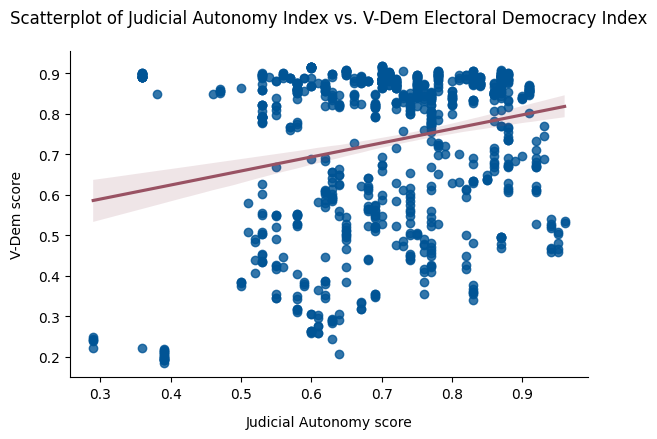

In [27]:
# Scatterplot of Judicial Autonomy Index vs. V-Dem Electoral Democracy Index

sns.lmplot(data=q1_index_macro_vdem, x='index_measure' , y='v2x_polyarchy',
           height=4, aspect=1.5,
           line_kws={'color': '#995263'},
           scatter_kws={'color': '#005495'}) 
plt.title('Scatterplot of Judicial Autonomy Index vs. V-Dem Electoral Democracy Index', fontsize=12, pad=20)
plt.xlabel('Judicial Autonomy score', labelpad=10)
plt.ylabel('V-Dem score', labelpad=10)

plt.savefig("../figures/judicial_autonomy_vdem_merged_scatterplot_regression.jpeg", format="jpeg", dpi=300)
plt.show();

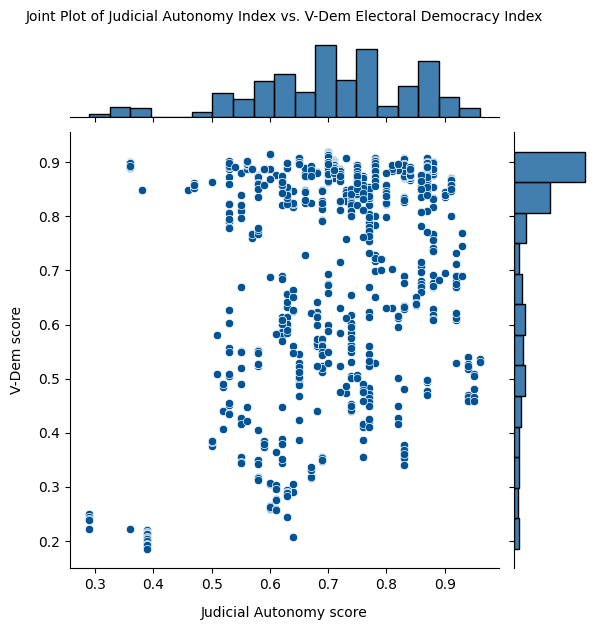

In [28]:
# Joint Plot of Judicial Autonomy Index vs. V-Dem Electoral Democracy Index

sns.jointplot(y=q1_index_macro_vdem['v2x_polyarchy'] , x=q1_index_macro_vdem['index_measure'], color='#005495')
plt.title('Joint Plot of Judicial Autonomy Index vs. V-Dem Electoral Democracy Index', fontsize=10, pad=80)
plt.xlabel('Judicial Autonomy score', labelpad=10)
plt.ylabel('V-Dem score', labelpad=10)

plt.savefig("../figures/judicial_autonomy_vdem_merged_jointplot.jpeg", format="jpeg", dpi=300)
plt.show();

#### 3.2 Correlation Coefficients of Judicial Autonomy Index vs. V-Dem Electoral Democracy Index

In [29]:
# Pearson Correlation
q1_index_macro_vdem_correlation_pear = q1_index_macro_vdem['v2x_polyarchy'].corr(q1_index_macro_vdem['index_measure'], method='pearson')
print("Pearson Correlation Coefficient:", q1_index_macro_vdem_correlation_pear)

# Spearman Correlation
q1_index_macro_vdem_correlation_spear = q1_index_macro_vdem['v2x_polyarchy'].corr(q1_index_macro_vdem['index_measure'], method='spearman')
print("Spearman Correlation Coefficient:", q1_index_macro_vdem_correlation_spear)


Pearson Correlation Coefficient: 0.23662333195183752
Spearman Correlation Coefficient: 0.11170584826285726


**Interpretation**: 
- The Pearson correlation coefficient (approx. 0.24) suggests a weak positive linear relationship between the Judicial Autonomy Index vs. V-Dem Electoral Democracy Index.
- Additionally, the Spearman correlation coefficient (approx. 0.11) suggests a very weak positive monotonic relationship between the two scores.
- Both coefficents suggest that the relationship between the two scores is weak (at least in terms of being linear or monotonic).

#### 3.3 Correlation Heatmap of Judicial Autonomy Indicators vs. V-Dem Electoral Democracy Index

In [30]:
# Select relevant columns for correlation heatmap
selected_columns_q1_index_macro_vdem=['v2x_regime', 
                                      'v2x_polyarchy',
                                      'q1_macro_appointment_procedures_ind_measure',
                                      'q1_macro_selection_criteria_ind_measure',
                                      'q1_macro_professional_rights_ind_measure',
                                      'q1_macro_professional_obligations_ind_measure',
                                      'q1_macro_judicial_administration_ind_measure']

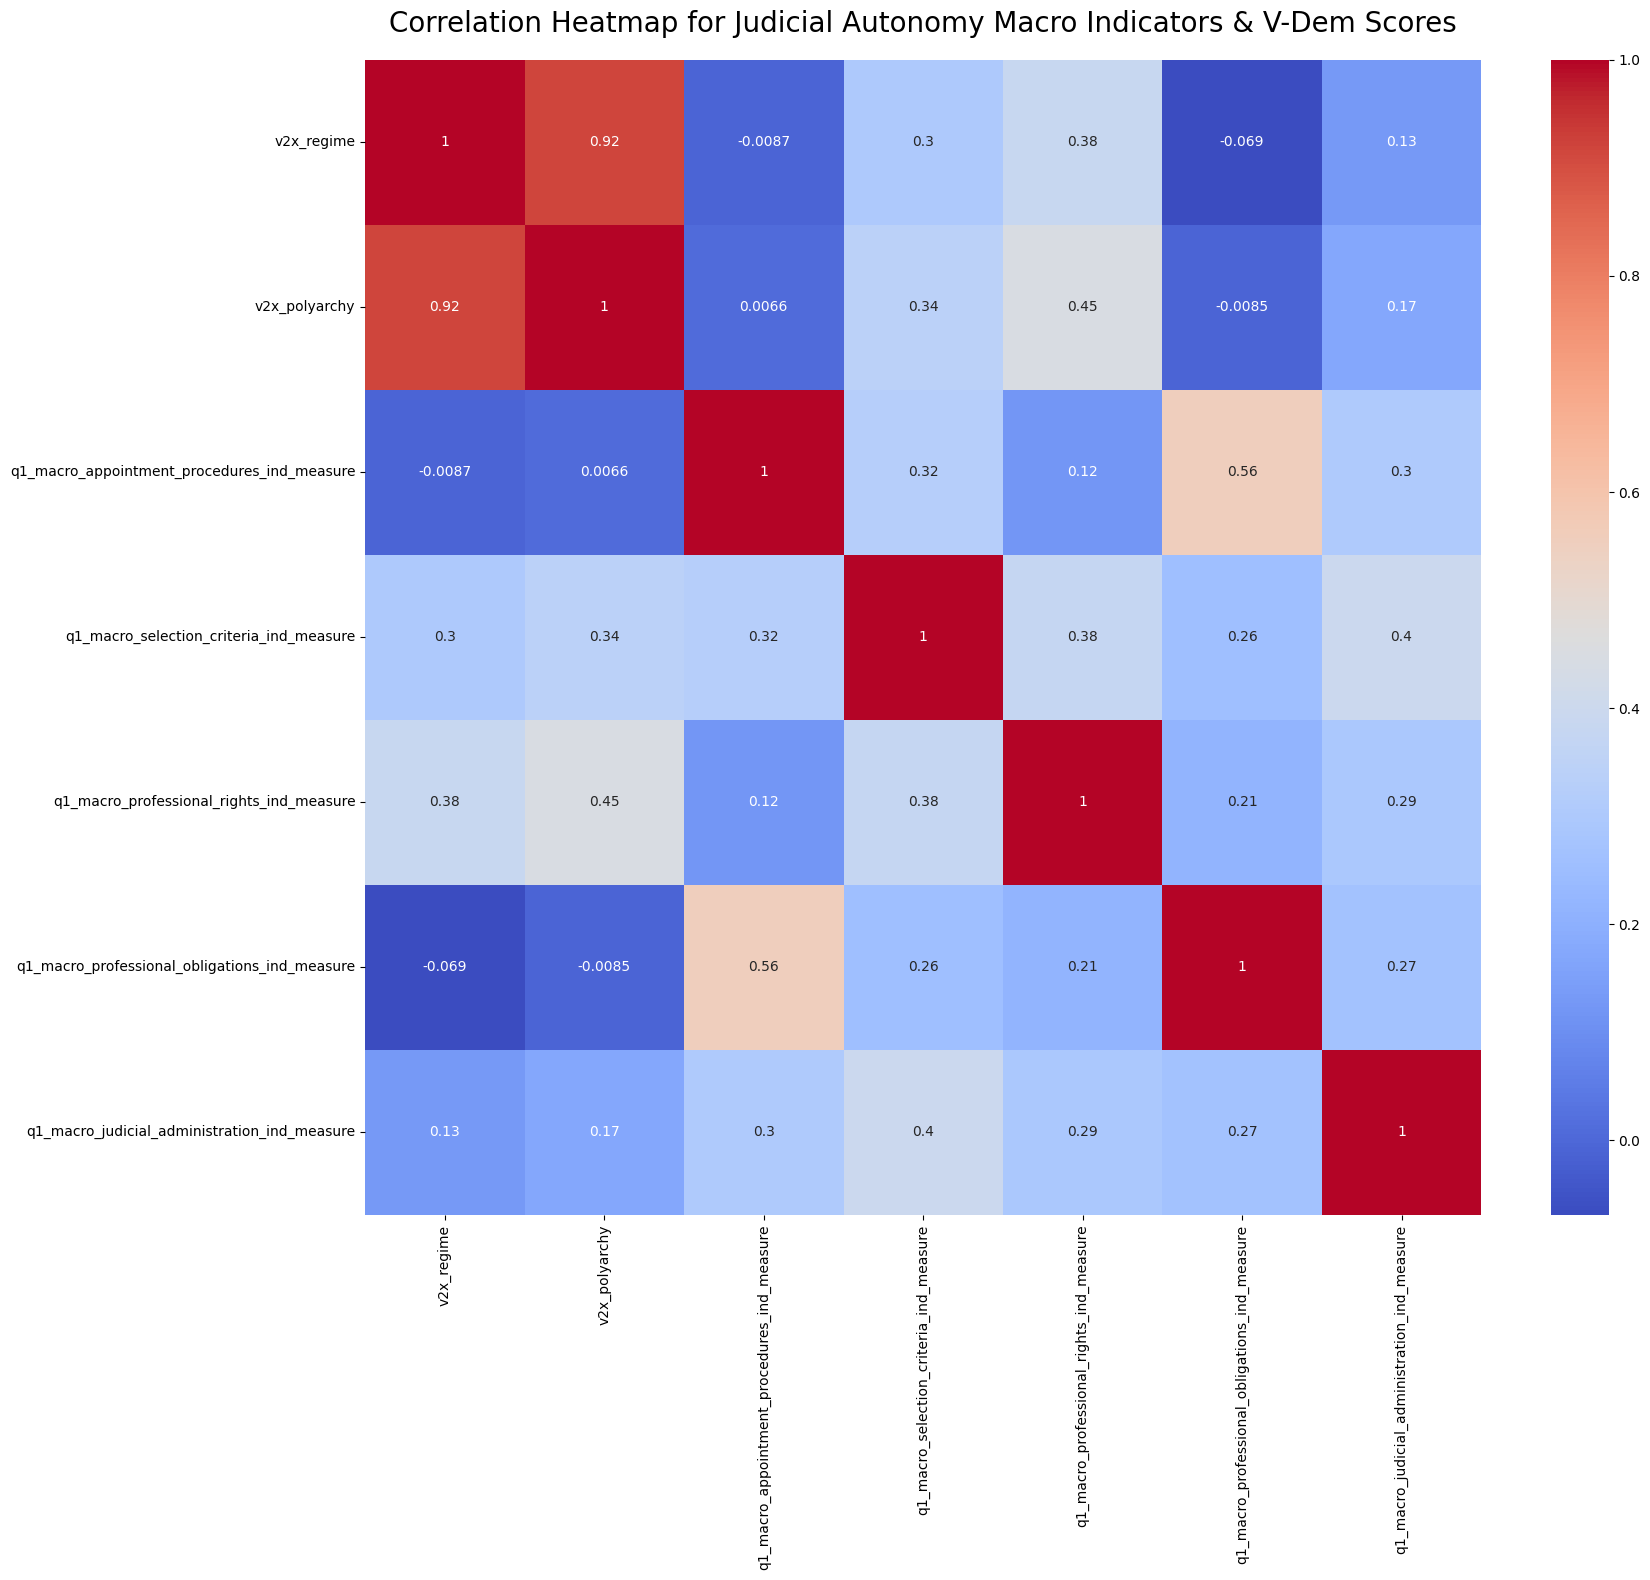

In [31]:
# Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Scores
correlation_matrix = q1_index_macro_vdem[selected_columns_q1_index_macro_vdem].corr()
plt.figure(figsize=(18, 15)) # change size (e.g. 15,12)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Scores", fontsize=20, pad=20)

plt.savefig("../figures/judicial_autonomy_vdem_merged_macro_heatmap.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show();

In [32]:
# Select relevant columns for correlation heatmap
selected_columns_q1_index_macro_micro_vdem=['v2x_regime', 
                                            'v2x_polyarchy',
                                            'q1_micro_appointment_judges_ind_measure',
                                            'q1_micro_appointment_court_presidents_ind_measure',
                                            'q1_micro_appointment_veto_ind_measure',
                                            'q1_micro_selection_predetermined_law_ind_measure',
                                            'q1_micro_selection_intl_standards_ind_measure',
                                            'q1_micro_transparency_appeal_ind_measure',
                                            'q1_micro_judge_tenure_ind_measure',
                                            'q1_micro_judge_immunity_ind_measure',
                                            'q1_micro_judge_salary_ind_measure',
                                            'q1_micro_disciplinary_proceedings_law_ind_measure',
                                            'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                            'q1_micro_conflict_recusal_evaluation_ind_measure',
                                            'q1_micro_judicial_self_governance_bodies_ind_measure',
                                            'q1_micro_judicial_self_governance_competences_ind_measure',
                                            'q1_micro_courts_administration_ind_measure']

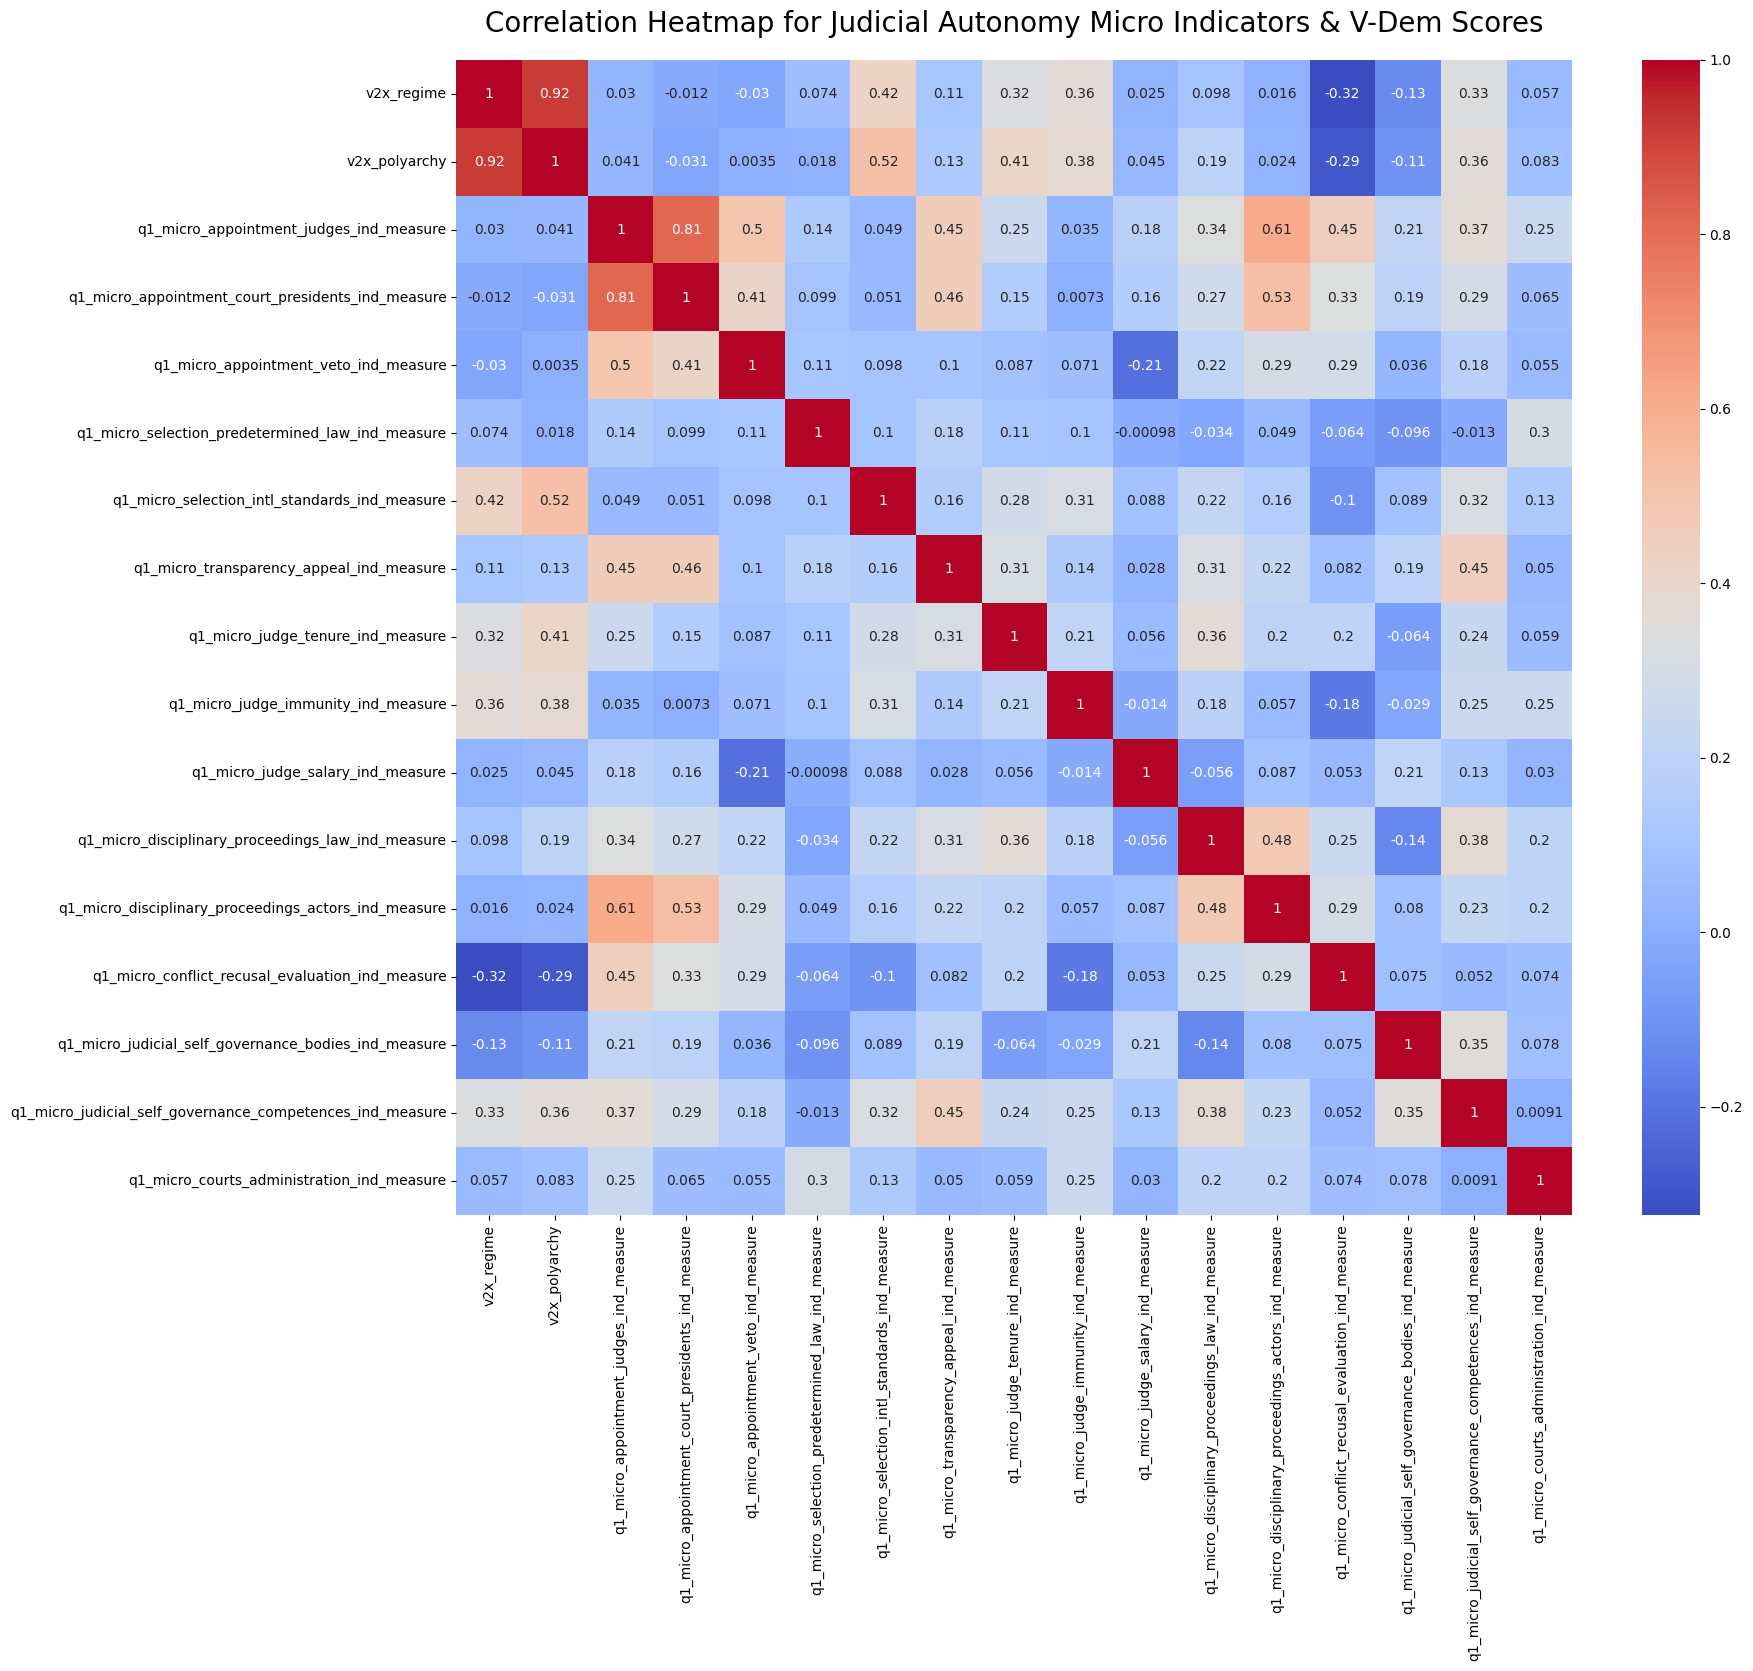

In [33]:
# Correlation Heatmap for Judicial Autonomy Micro Indicators & V-Dem Scores

correlation_matrix = q1_index_macro_micro_vdem[selected_columns_q1_index_macro_micro_vdem].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Micro Indicators & V-Dem Scores", fontsize=20, pad=20)

plt.savefig("../figures/judicial_autonomy_vdem_merged_micro_heatmap.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show();